### Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Data

In [4]:
url = 'https://github.com/rafiadabhi/MPDW/raw/main/Pertemuan%201/Data/SM_2019-2023.xlsx'

pjme = pd.read_excel(url,
                     index_col=[0],
                     parse_dates=[0])

print(pjme.head())

                  sm
time                
2019-01-01  0.384170
2019-01-02  0.386809
2019-01-03  0.362893
2019-01-04  0.400295
2019-01-05  0.376442


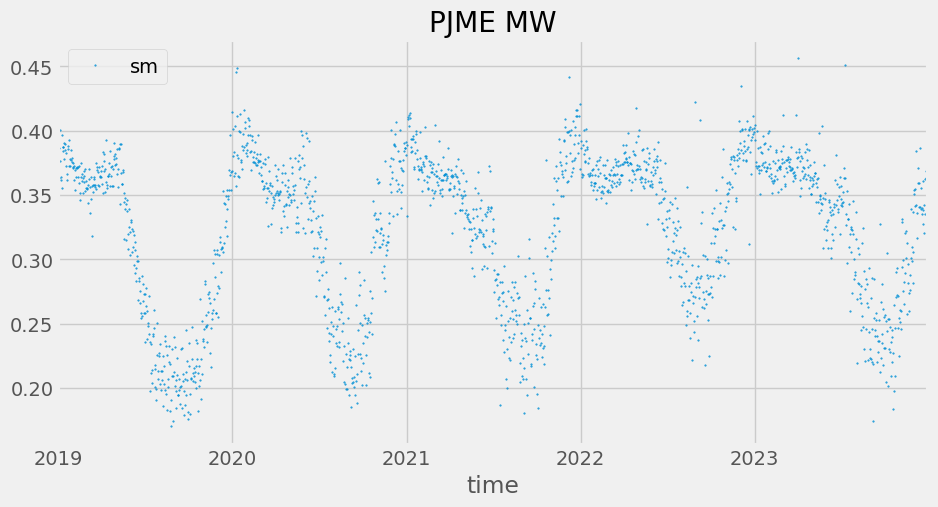

In [5]:
color_pal = sns.color_palette()
pjme.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='PJME MW')
plt.show()

### Time Series Features

In [ ]:
# Tidak ada yang berubah di sini
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Membuat fitur time series dari datetime index (SUDAH DISESUAIKAN UNTUK DATA HARIAN).
    """
    df = df.copy()
    df['date'] = df.index
    
    # df['hour'] = df['date'].dt.hour  # DIHAPUS: Tidak relevan untuk data harian
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    # DIPERBARUI: Menggunakan .isocalendar().week
    df['weekofyear'] = df['date'].dt.isocalendar().week 
    
    # DIHAPUS: Logika musim belahan bumi utara, tidak relevan untuk Indonesia
    # df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300
    # df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
    #                       labels=['Spring', 'Summer', 'Fall', 'Winter']
    #                )
    
    # 'hour', 'season' DIHAPUS dari daftar X
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday']]
    
    if label:
        y = df[label]
        return X, y
    return X

# ---------------------------------------------------------------------------
# GANTI 'NAMA_KOLOM_SM_ANDA' dengan nama kolom target Anda (Soil Moisture)
# ---------------------------------------------------------------------------
NAMA_KOLOM_TARGET = 'NAMA_KOLOM_SM_ANDA'  # <-- GANTI INI

# Pastikan Anda sudah menjalankan kode pd.read_excel('...') sebelumnya
# Asumsi data Anda ada di DataFrame 'pjme'
X, y = create_features(pjme, label=NAMA_KOLOM_TARGET)

# Menggabungkan kembali untuk analisis
features_and_target = pd.concat([X, y], axis=1)

# Tampilkan 5 baris pertama dari fitur baru dan target
print(features_and_target.head())